# Regresión logística para predicciones bancarias.

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/bank/bank.csv"
data = pd.read_csv(url, sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.shape
#4119 filas y 21 columnas.

(4119, 21)

In [4]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [5]:
#Para pasar de 0 y 1 la columna y
data["y"] = (data["y"]=="yes").astype(int)

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [7]:
len(data["education"].unique())

8

In [8]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
#Poner los niveles de estudios básicos: basic.4y, basic.6y,basic.9y como Basic
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"] )
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"] )
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"] )

In [10]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [11]:
data["education"] = np.where(data["education"]=="high.school", "High School", data["education"] )
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"] )
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"] )
data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"] )
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"] )

In [12]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [13]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [14]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


* El promedio (age) de edad de quien compra es mayor del que no compra. (Franja de 40 años)
* pdays cliente contactado por ultima vez. (cuando menor se al numero de dias desde que se ha contactado tiene  mas posibilidades tienen de comprar
* Campains: (numero de campañas) cuantas menos veces contactamos con un cliente mas posibilidades hay de que compre el producto.

In [15]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


### visualizacion de los datos

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Frecuencia de compra del producto')

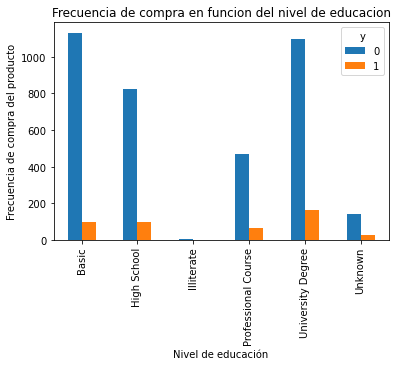

In [17]:
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del nivel de educacion")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

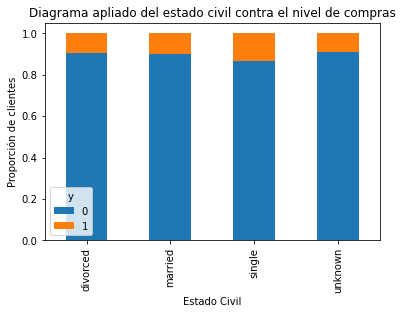

In [18]:
table= pd.crosstab(data.marital, data.y)
        #Div... escalar entre 0-1
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apliado del estado civil contra el nivel de compras")
plt.xlabel("Estado Civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

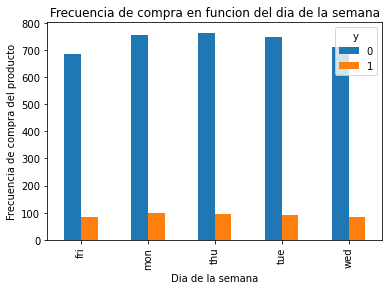

In [19]:
pd.crosstab(data.day_of_week, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

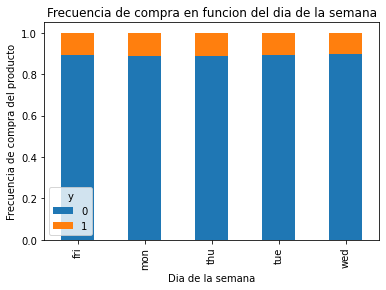

In [20]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en funcion del dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

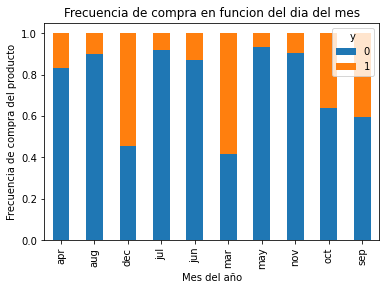

In [21]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en funcion del dia del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

El mes puede ser un predicctor, pero mejor verlo con stacker porque igual hay menos datos

Text(0, 0.5, 'Frecuencia de compra del producto')

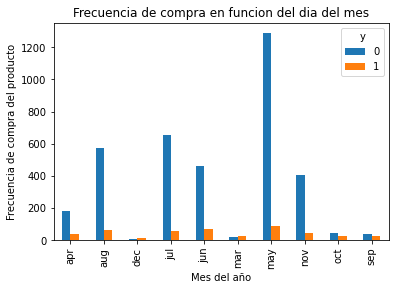

In [22]:
table.plot(kind="bar", stacked=False)
plt.title("Frecuencia de compra en funcion del dia del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Aqui se puede intuir que las campañas y los mese donde se rechazan abril, mayo junio julio y agosto
que parece que es cuando mas se ofrecen los productos.

Text(0, 0.5, 'Cliente')

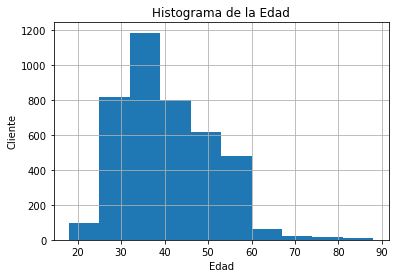

In [23]:
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

la mayoria esta entre los 30 y los 40 años.
intervalo de confianza, entre los 30 y los 60 a partir de los 60 no piensan en invertir porque piensan en la jubilacion

Text(0, 0.5, 'Frecuencia de compra del producto')

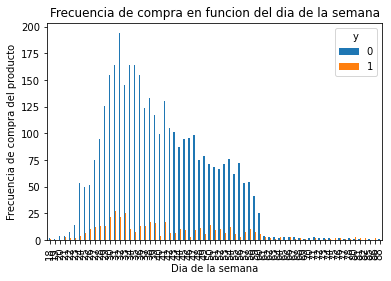

In [24]:
pd.crosstab(data.age, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de compra del producto")

<AxesSubplot:xlabel='poutcome'>

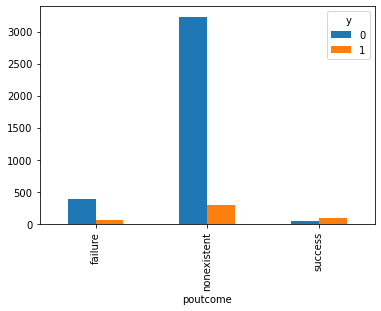

In [25]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

Los que han fracasado tienen tendencia a decir que no en inversion en bolsa, los que no conocen tambien.
Pero los que ham tenido experiencia positiva suelen decir que si.

## Conversion de las variables categórcas a dummies

In [26]:
categories = ["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [27]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0


In [28]:
data_vars = data.columns.values.tolist()

In [29]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [30]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [31]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

#### Seleccion de rasgos para el modelo. (newton raphson)

In [32]:
n = 12

In [33]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

In [35]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [36]:
print(rfe.support_)

[False False False False False False False False  True False False False
 False False False False  True False False False False False False False
 False  True False False  True False False False False False False False
  True False False False  True False  True False False  True  True  True
  True False False False False False False False False  True]


In [37]:
print(rfe.ranking_)

[36 46 24 47  3 27 30 28  1 41  8 40 20 29 13  4  1 39 11  7  9 45 19 34
 37  1 21 12  1 35 25 44 14  6 38 22  1 43 16 26  1  5  1 23 17  1  1  1
  1 10 31 32 42 33 15  2 18  1]


Todas las variables mas cercanas a 1 son las más probables de que se queden.

In [38]:
z = zip(bank_data_vars, rfe.support_, rfe.ranking_)
list(z)

[('age', False, 36),
 ('duration', False, 46),
 ('campaign', False, 24),
 ('pdays', False, 47),
 ('previous', False, 3),
 ('emp.var.rate', False, 27),
 ('cons.price.idx', False, 30),
 ('cons.conf.idx', False, 28),
 ('euribor3m', True, 1),
 ('nr.employed', False, 41),
 ('y', False, 8),
 ('job_admin.', False, 40),
 ('job_blue-collar', False, 20),
 ('job_entrepreneur', False, 29),
 ('job_housemaid', False, 13),
 ('job_management', False, 4),
 ('job_retired', True, 1),
 ('job_self-employed', False, 39),
 ('job_services', False, 11),
 ('job_student', False, 7),
 ('job_technician', False, 9),
 ('job_unemployed', False, 45),
 ('job_unknown', False, 19),
 ('marital_divorced', False, 34),
 ('marital_married', False, 37),
 ('marital_single', True, 1),
 ('marital_unknown', False, 21),
 ('education_Basic', False, 12),
 ('education_High School', True, 1),
 ('education_Illiterate', False, 35),
 ('education_Professional Course', False, 25),
 ('education_University Degree', False, 44),
 ('education_Un

In [39]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

Da mucha presencia a los meses, podria interpretarse como una serie temporal.

In [40]:
#Variables predictoras.
X = bank_data[cols]
# Variable a predecir.
Y = bank_data["y"]

### Implementación del modelo en Python con statsmodel.api

In [41]:
import statsmodels.api as sm

C:\Users\Alberto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Alberto\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [42]:
logit_model = sm.Logit(Y, X)

In [43]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [44]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2022-03-06 12:07  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

Factor r^2 no es elevando.

El dia de la semana en el P valor es relaticamente alto y si esta jubilado o no.
El resto de variables si son buenas para el modelo


### Implementaciñon del modelo en Python com sckit-learn

In [45]:
from sklearn import linear_model

In [46]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression()

In [47]:
logit_model.score(X,Y)

0.8958485069191552

es muy alto con respecto a cualquier otro modelo que podamos crear.

### Error naïve:

In [48]:
Y.mean()*100

10.949259529011895

practicamente el 10.9% de la gente compra.

Sin crear el modelo predecir que la gente no compra:

In [49]:
(1-Y.mean())*100

89.0507404709881

* sabriamos que el 89.05% de la gente no compra. si lo comparamos con el modelo que hemos creado de regresion logistica
* obtenemos un 89.6% la eficacia de acertar (un poquito mas elevada, se habria superado)

In [50]:
#Colocamos los nombres junto a su coeficiente exacto.
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5362541179381441]
1,euribor3m,[-0.5443670397995519]
2,job_blue-collar,[-0.3533138743513553]
3,job_retired,[0.3616515908117601]
4,month_aug,[0.6292588895067256]
5,month_dec,[1.194397457211869]
6,month_jul,[0.9630554140660172]
7,month_jun,[1.0566897056468874]
8,month_mar,[1.638668023458549]
9,month_nov,[0.4577084191058709]


# Logaritmo del coeficiente de probabilidades.
El coeficiente de la variable previous es de 0.53. si la variable previous incrementa en una unidad el cociente de probabilidad se incrementara en medio punto. 
Los mejores son los datos como las variables del mes de diciembre, cada vez que se contacta con alguien en diciembre las posibilidades
de venta se incrementan en 1,63

job-blue-collar o euribor decrementa las opciones de venta (Por cada punto que sube el euribor el coeficiente de probabilidades baja en medio punto).

# Validación del modelo logístico.
Objetivo de eliminar el overfiting, que se ajuste demasiado a los puntos y los que no se asemejen se comporte mal

In [137]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=0)

In [131]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

### El modelo decide las probabilidades.
Definir threshold, si la probabilidad es mayor a cierto umbral se considerara como 0 o si es mayor al umbral se considerara com 1

In [132]:
probs = lm.predict_proba(X_test)

In [133]:
probs

array([[0.95409621, 0.04590379],
       [0.83896646, 0.16103354],
       [0.93216535, 0.06783465],
       ...,
       [0.65098445, 0.34901555],
       [0.97381005, 0.02618995],
       [0.57635748, 0.42364252]])

#### Primera col como de seguro estoy de lo que estoy diciendo  La segunda es la probabilidad del valor de salida.
Por defecto si la segunda columna es superior a 0.5 entonces la observacion se categoriza como compra
si es menor de 0.5 se catalogara como no compra

In [135]:
prediction = lm.predict(X_test)

In [136]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [138]:
from IPython.display import display, Math, Latex

* Por defecto el modelo va a trabajar:

In [139]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [140]:
probs = lm.predict_proba(X_test)

In [141]:
probs

array([[0.95409621, 0.04590379],
       [0.83896646, 0.16103354],
       [0.93216535, 0.06783465],
       ...,
       [0.65098445, 0.34901555],
       [0.97381005, 0.02618995],
       [0.57635748, 0.42364252]])

In [142]:
prediction = lm.predict(X_test)

In [143]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [145]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [144]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.045904,0
1,0.161034,1
2,0.067835,0
3,0.062222,0
4,0.042308,0


In [146]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [147]:
390/len(prob_df)*100

31.55339805825243

31% es la cantida de posibles compradores. con 0.1 puede ser muy agresivo.

In [148]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,915
1,321


In [149]:
331/len(prob_df)*100

26.779935275080906

26% es la cantida de posibles compradores. con 0.15 puede ser muy agresivo.

In [150]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,504
1,732


In [151]:
732/len(prob_df)*100

59.22330097087378

59% es la cantida de posibles compradores. con 0.05 puede ser muy agresivo.

In [152]:
from sklearn import metrics

In [153]:
metrics.accuracy_score(Y_test, prediction)

0.901294498381877

Acertariamos el 90% de los casos.

# Validación cruzada
* Kfold validation


Para que no sufra problemas de overfiting


In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

In [69]:
scores

array([0.90533981, 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89320388, 0.88807786])

In [70]:
scores.mean()

0.8943903101599225

Promedio de 89,4% de eficaci, Va acorde con el 90% de eficacia de la etapa anterior

# Matrices de confusión y Curvas ROC 

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [83]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [84]:
probs = lm.predict_proba(X_test)

In [85]:
prob=probs[:,1]
prob_df = pd.DataFrame(prob)

,0,prediction,actual
0,0.045904,0,0
1,0.161034,1,0
2,0.067835,0,0
3,0.062222,0,0
4,0.042308,0,0


In [120]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    prob_df["actual"] = list(Y_test)
    prob_df.head()

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN=confusion_matrix[0][0]
    TP=confusion_matrix[1][1]
    FP=confusion_matrix[0][1]
    FN=confusion_matrix[1][0]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)

sensitivities.append(0)
especifities_1.append(0)

In [121]:
sensitivities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6229508196721312,
 0.5163934426229508,
 0.45081967213114754,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.12295081967213115,
 0]

In [122]:
especifities_1

[1,
 0.7800718132854578,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.21992818671454217,
 0.12387791741472176,
 0.08617594254937166,
 0.07181328545780974,
 0.06463195691202872,
 0.022441651705565557,
 0.013464991023339312,
 0]

### Representamos la curva ROC

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Curva ROC')

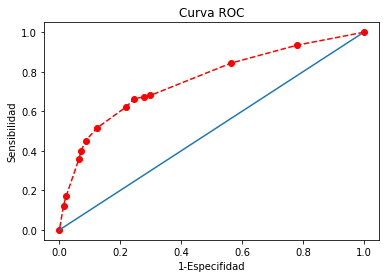

In [126]:
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especifidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

Una curva roc por debajo de la diagona es lo peor, (como tirar una modelo al aire)
en el mejor de los casos deberia de ser una esquina hacia arriva.